# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Analog to Digital Conversion
***

Referring to Section 5.8.2, the step size between levels for an N-bit ADC may be written as

$$
    Q = {LSB} = \frac{V_{{FS}}}{2^N-1} \hspace{0.5in} \text{(V)}
$$
***

Begin by setting the library path

In [1]:
import lib_path

Set the number of bits and sampling frequency (Hz) in the ADC

In [2]:
number_of_bits = 3

sampling_frequency = 100

Set the start frequency (Hz), end frequency (Hz), amplitude modulation frequency (Hz) and amplitude (relative) for a sample analog signal

In [3]:
start_frequency = 10

end_frequency = 40

am_amplitude = 0.1

am_frequency = 20

Generate the "analog" signal using the `linspace` and `chirp` routines from `scipy`

In [4]:
from numpy import linspace, sin

from scipy.constants import pi

from scipy.signal import chirp

t = linspace(0.0, 1.0, 4196)

a_signal = chirp(t, start_frequency, t[-1], end_frequency)

a_signal *= (1.0 + am_amplitude * sin(2.0 * pi * am_frequency * t))

Set up the waveform

In [5]:
from numpy import arange

time = arange(sampling_frequency + 1) / sampling_frequency

if_signal = chirp(time, start_frequency, time[-1], end_frequency)

if_signal *= (1.0 + am_amplitude * sin(2.0 * pi * am_frequency * time))

Calculate the envelope using the `quantize` routine

In [6]:
from Libs.receivers import quantization

quantized_signal, error_signal = quantization.quantize(if_signal, number_of_bits)

Use the `matplotlib` routines to display the resulting quantized signal

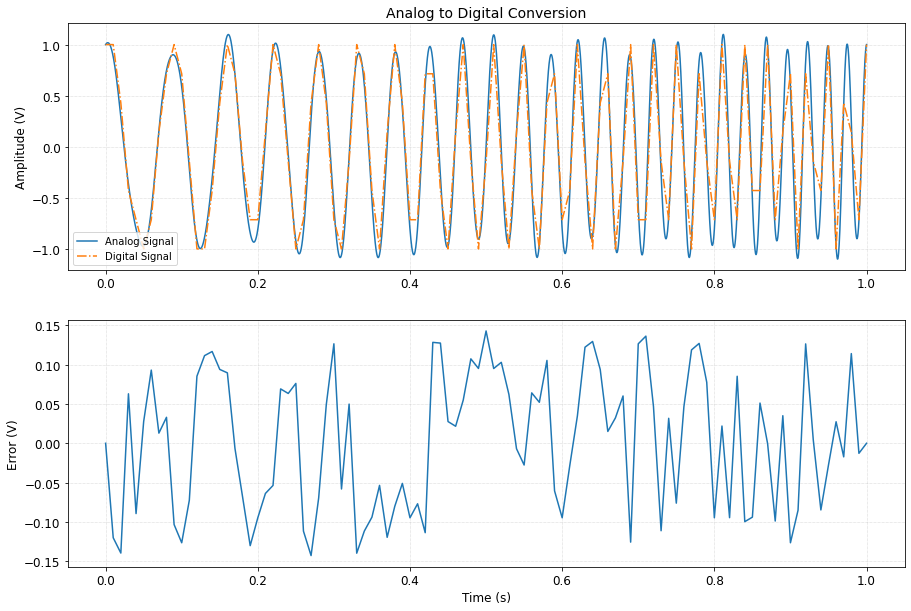

In [7]:
from matplotlib import pyplot as plt

from matplotlib.figure import Figure


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

fig, (axes1, axes2) = plt.subplots(2, 1)

axes1.plot(t, a_signal, '', label='Analog Signal')

axes1.plot(time, quantized_signal, '-.', label='Digital Signal')

axes2.plot(time, error_signal, '', label='Quadrature')


# Set the plot title and labels

axes1.set_title('Analog to Digital Conversion', size=14)

axes2.set_xlabel('Time (s)', size=12)

axes1.set_ylabel('Amplitude (V)', size=12)

axes2.set_ylabel('Error (V)', size=12)


# Set the tick label size

axes1.tick_params(labelsize=12)

axes2.tick_params(labelsize=12)


# Turn on the grid

axes1.grid(linestyle=':', linewidth=0.5)

axes2.grid(linestyle=':', linewidth=0.5)


# Show the legend

axes1.legend(loc='lower left', prop={'size': 10})